# Homework 3

# Summary
 This report explores multiple datasets through analysis, visualization, and data cleaning. Key tasks include examining the IRIS dataset for patterns, analyzing birdwatching data from Artportalen, exploring stroke prediction data, and cleaning a cell phone usage dataset. Each section provides clear steps, insights, and conclusions based on the findings.

# Exploratory Data Analysis

The file IRIS.csv contains data on three types of iris flowers, including their various measurements.
Below, we can see the format of the data:

In [62]:
library(tidyverse)
library(ggplot2)
library(patchwork)  
library(GGally)
library(knitr)
library(dplyr)
library(hms)

iris <- read.csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv')
head(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


## Relationship between sepal dimensions and petal dimensions
In Figures 1 and 2, we observe that the species Versicolor and Virginica appear to have a linear relationship between sepal length (width) and petal length (width). Specifically, longer (wider) sepals tend to correspond to longer (wider) petals. In contrast, the Setosa species seems to exhibit an uncorrelated relationship between these dimensions. This is evident in both figures, where the slope is almost horizontal.

It is worth noting that the dataset is relatively small, so this analysis should be interpreted with caution.


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


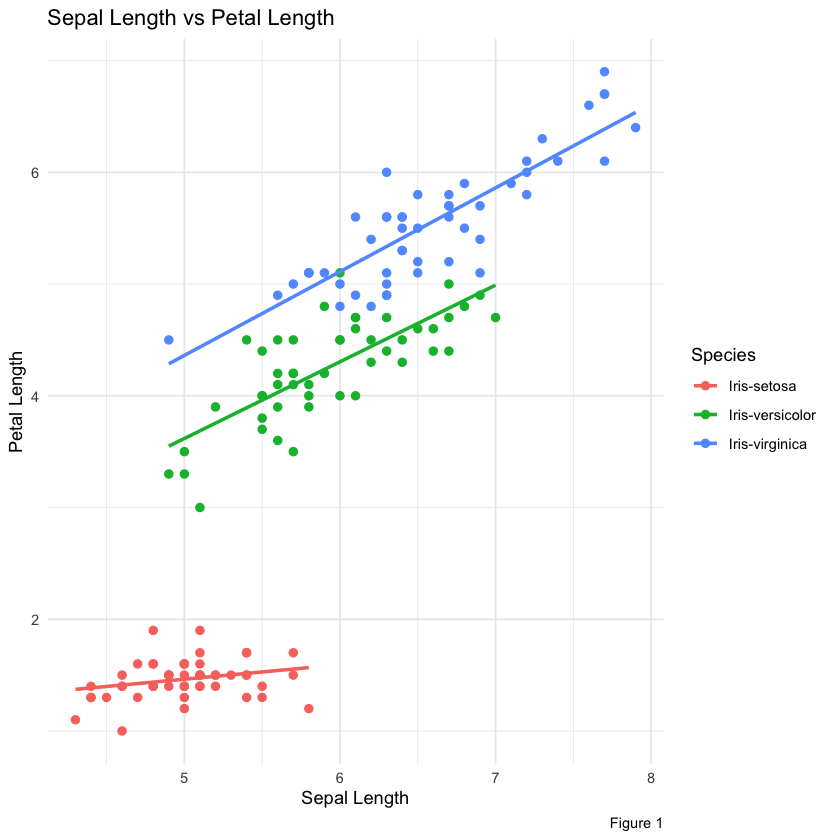

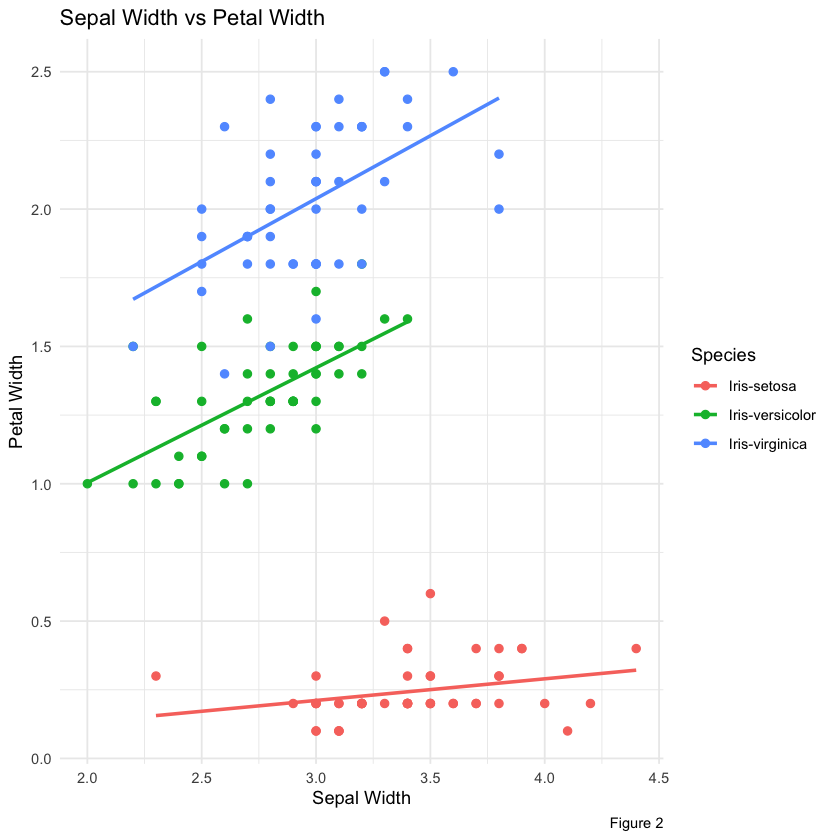

In [94]:
# Sepal length gainst petal length  
ggplot(iris, aes(sepal_length,petal_length, color = species))+
  geom_point(size = 2)+
  geom_smooth(se = FALSE,method='lm')+
   labs(
    title = "Sepal Length vs Petal Length",
    x = "Sepal Length",
    y = "Petal Length",
    color = 'Species',
   caption = 'Figure 1')+
  theme_minimal()

# Sepal width against petal width
ggplot(iris, aes(sepal_width,petal_width, color = species))+
  geom_point(size = 2)+
  geom_smooth(se = FALSE,method='lm')+
   labs(
    title = "Sepal Width vs Petal Width",
    x = "Sepal Width",
    y = "Petal Width",
    color = 'Species',
    caption = 'Figure 2')+
  theme_minimal()

## The distribution of the sepal and petal dimensions
In Boxplots 1–4, we observe the distribution of sepal and petal dimensions. Based on these boxplots, we can draw the following conclusions:

* Setosa has narrower and shorter petals and sepals compared to the other two species. However, on average, it has wider sepals (as seen in Boxplots 1–4). Additionally, the variation is very low for the first three dimensions mentioned but is relatively high for the fourth.
* Virginica has the largest petals, both in terms of width and length.
* The most distinguishing factor between the species is the petal dimensions. This is evident as the boxplots show greater separation between species for petal measurements compared to sepal measurements.


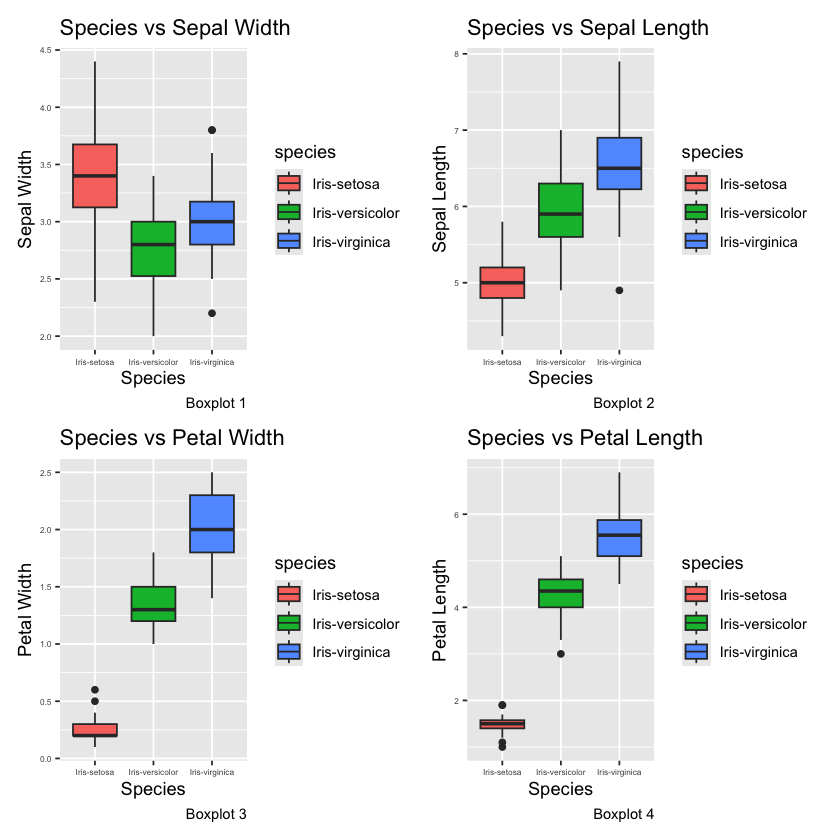

In [136]:
# Species vs Sepal Width
p1 <- ggplot(iris, aes(species,sepal_width,fill= species))+
  geom_boxplot()+
  labs(title = 'Species vs Sepal Width',
       x = 'Species',
       y = 'Sepal Width',
      caption = 'Boxplot 1')+
  theme(axis.text.x = element_text(size = 5), 
  axis.text.y = element_text(size = 5))

# Species vs Sepal Length
p2 <- ggplot(iris, aes(species,sepal_length,fill= species))+
  geom_boxplot()+
  labs(title = 'Species vs Sepal Length',
       x = 'Species',
       y = 'Sepal Length',
      caption = 'Boxplot 2')+
  theme(axis.text.x = element_text(size = 5), 
  axis.text.y = element_text(size = 5))

# Species vs Sepal Width
p3 <- ggplot(iris, aes(species,petal_width,fill= species))+
  geom_boxplot()+
  labs(title = 'Species vs Petal Width',
       x = 'Species',
       y = 'Petal Width',
      caption = 'Boxplot 3')  +
  theme(axis.text.x = element_text(size = 5), 
    axis.text.y = element_text(size = 5))

# Species vs Petal Length
p4 <- ggplot(iris, aes(species,petal_length,fill= species))+
  geom_boxplot()+
  labs(title = 'Species vs Petal Length',
       x = 'Species',
       y = 'Petal Length',
      caption = 'Boxplot 4') +
  theme(axis.text.x = element_text(size = 5), 
  axis.text.y = element_text(size = 5)) 

(p1|p2)/(p3|p4)

## Relation of varibles with pairs-plot
Pairs-plot is a good way to visualize how varibles relate to each other. In figure 7 we can see the corresponding paris-plot for this dataset. Here are some conclusions atained from the plot:
* The species differ most in the distribution of petal width & length and least in sepal width, as seen by the overlap in their empirical density curves.
* Versicolor and Virginica exhibit clearer correlations in their dimensions, making them easier to distinguish. In contrast, Setosa shows a clear correlation only between sepal length and sepal width.
* The petal length and width of Setosa have relatively low variance, which is evident from the sharp peak in its density curves.
* Versicolor and Virginica share more similarities with each other compared to Setosa, in terms of dimensions.


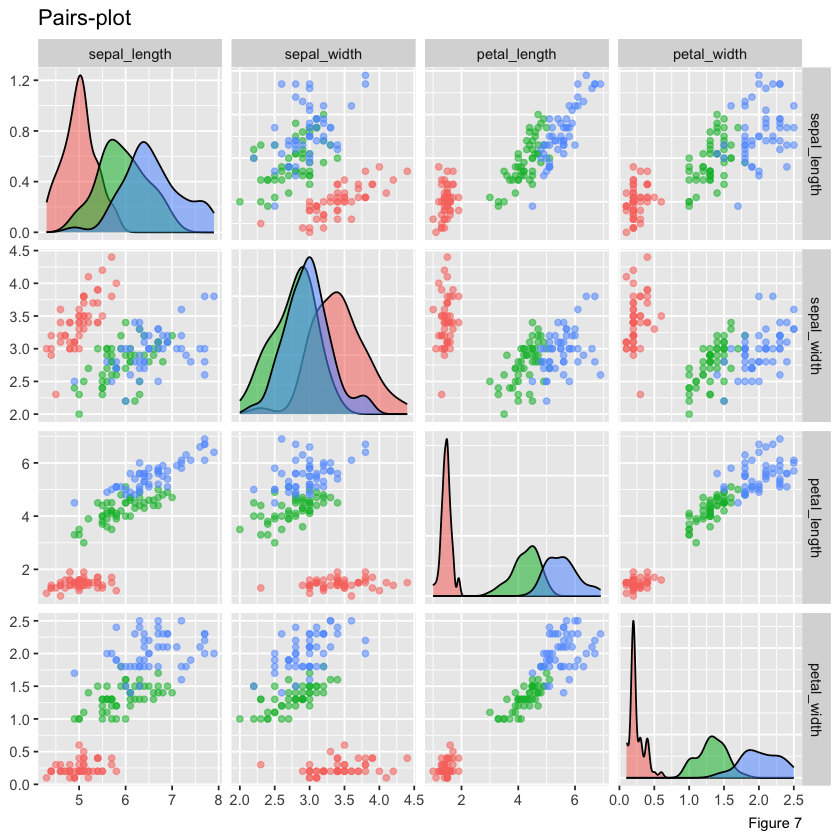

In [93]:
ggpairs(iris,columns = 1:4,aes(color = species,alpha = 0.5),
        upper = list(continuous = "points"))+
        labs(title = 'Pairs-plot',
            caption = 'Figure 7')

# Birdwatching
The file artportalen.csv contains bird sighting data from 2022 in the royal national park, collected through citizen science. 
Here is a glimpse of the data:

In [143]:
birds <- read.csv('true.txt')
head(birds)

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt.namn,Auktor,Antal,Ålder.stadium,Kön,Aktivitet,⋯,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,97785066,55235,NA,Koltrast,Turdus merula,"Linnaeus, 1758",2,NA,NA,NA,⋯,Uppland,Solna,2022-01-01,NA,2022-01-01,NA,NA,NA,Björn Lindkvist,Björn Lindkvist
2,97785067,54989,NA,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NA,NA,NA,⋯,Uppland,Solna,2022-01-01,NA,2022-01-01,NA,NA,NA,Björn Lindkvist,Björn Lindkvist
3,97785310,55235,NA,Koltrast,Turdus merula,"Linnaeus, 1758",1,NA,NA,NA,⋯,Uppland,Solna,2022-01-01,NA,2022-01-01,NA,NA,NA,Anders Eriksson,Anders Eriksson
4,97786982,54735,NA,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NA,hona,NA,⋯,Uppland,Solna,2022-01-01,NA,2022-01-01,NA,NA,NA,Anders Eriksson,Anders Eriksson
5,97786985,54944,NA,Skata,Pica pica,"(Linnaeus, 1758)",2,NA,NA,NA,⋯,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NA,NA,Henrik Spovin,Henrik Spovin
6,97786990,55232,NT,Björktrast,Turdus pilaris,"Linnaeus, 1758",10,NA,NA,NA,⋯,Uppland,Solna,2022-01-01,NA,2022-01-01,NA,NA,NA,Anders Eriksson,Anders Eriksson


## The most prevelant species
In Table 1, we can see the top five most prevalent species. Notably, some observations of the species Gröniska show an 'Antal' value exceeding 1,000. Could this be a typo? Have this in mind.

In [50]:
counted_birds <- birds %>% 
  group_by(Artnamn) %>% 
  select(Artnamn,Antal) %>% 
  mutate(Antal = as.numeric(Antal)) %>% 
  summarize(count=sum(Antal,na.rm=TRUE)) %>% 
  arrange(desc(count))
  
kable(head(counted_birds,5),
      caption = '1')



Table: 1

|Artnamn       | count|
|:-------------|-----:|
|Grönsiska     | 20211|
|Sothöna       |  8308|
|Gräsand       |  7167|
|Storskrake    |  6750|
|Vitkindad gås |  6345|

## Monthly distribution of the top 3 most prevelant species
In Figure 8, we have plotted the monthly distribution of the three most prevalent species. We observe that all three species are more frequently seen at the beginning of the year.

`summarise()` has grouped output by 'Artnamn'. You can override using the
`.groups` argument.


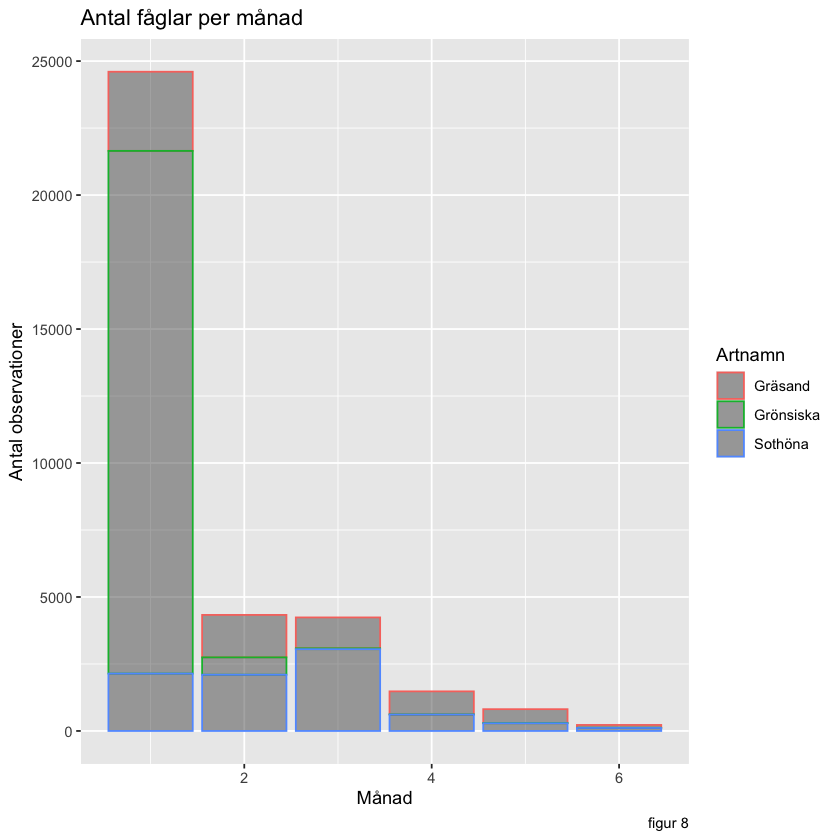

In [141]:
prelevent_birds <- birds %>% 
  group_by(Artnamn) %>% 
  mutate(Månad = as.numeric(sapply(strsplit(Startdatum,'-'),`[`, 2),na.rm=TRUE))%>% 
  mutate(Antal = ifelse( is.na(as.numeric(Antal)), NA, as.numeric(Antal))) %>% 
  select(Artnamn,Antal,Månad) %>% 
  group_by(Artnamn,Månad) %>% 
  summarize(Antal = sum(Antal,na.rm =TRUE)) %>% 
  filter(Artnamn %in%  c("Grönsiska","Sothöna","Gräsand"))


ggplot(prelevent_birds, aes(x = Månad, y = Antal, color = Artnamn)) +
  geom_histogram(stat='identity',alpha = 0.5)+
  labs(
    title = "Antal fåglar per månad",
    x = "Månad",
    y = "Antal observationer",
    color = "Artnamn",
    caption = 'figur 8')



## The rarest species
In Table 2, we see the rarest species. The Ob. Korsnäbb has not been observed at all, making it the rarest bird. The second place is shared by 19 species, of which only four are displayed here.


In [144]:
reareast_birds <- counted_birds %>%
  arrange(count)

kable(head(reareast_birds,5),caption = '2')



Table: 2

|Artnamn        | count|
|:--------------|-----:|
|Ob. korsnäbb   |     0|
|Bivråk         |     1|
|Bändelkorsnäbb |     1|
|Ejder          |     1|
|Fjällvråk      |     1|

## Most lucky/skilled watcher
In table 3 we can see the top 10 best watcher in terms of observed birds per day. The list is based on those who have been out more than 5 times(days).
One could argue that this is not very representative of the skills/luck, as an observer might have a specific goal (e.g., targeting certain bird species) and may not register every bird they encounter.

In [148]:
lucky_watcher <- birds %>% 
  select(Rapportör,Antal,Startdatum) %>% 
  mutate(Antal = ifelse( is.na(as.numeric(Antal)), NA, as.numeric(Antal))) %>% 
  group_by(Rapportör,Startdatum) %>% 
  summarize(Antal = sum(Antal,na.rm=TRUE)) %>%
  ungroup(Startdatum) %>% 
  summarize(Totala_antal_fåglar =  sum(Antal),Dagar = n()) %>% 
  mutate(Fågel_per_dag = round(Totala_antal_fåglar/Dagar,1)) %>% 
  arrange(desc(Fågel_per_dag)) %>% 
  filter(Dagar > 5)

kable(head(lucky_watcher,10),caption = '3')

`summarise()` has grouped output by 'Rapportör'. You can override using the
`.groups` argument.




Table: 3

|Rapportör          | Totala_antal_fåglar| Dagar| Fågel_per_dag|
|:------------------|-------------------:|-----:|-------------:|
|Svante Söderholm   |               50079|    72|         695.5|
|Michael Löfroth    |                2745|    13|         211.2|
|Mats Larsson       |                1767|    10|         176.7|
|Mattias Öberg      |                 752|     6|         125.3|
|Erik Jonsson       |                1250|    11|         113.6|
|Cecilia Ryberg     |                 942|     9|         104.7|
|Max Karlsson       |                1773|    18|          98.5|
|Ari Määttä         |                3149|    34|          92.6|
|Henrik Waldenström |                 938|    11|          85.3|
|Per Gullberg       |                3824|    48|          79.7|

## Distribution of obeserved birds throughout the day
As seen in Figure 9, birds are most frequently observed in the evening or mid-day. This pattern could reflect the birds behavior, such as foraging for food in the morning, but it might also result from observers tending to go birdwatching during these times. The spikes in the plot are due to outliers, with some observations, as mentioned earlier, having an "Antal" value of 1,000 or more.

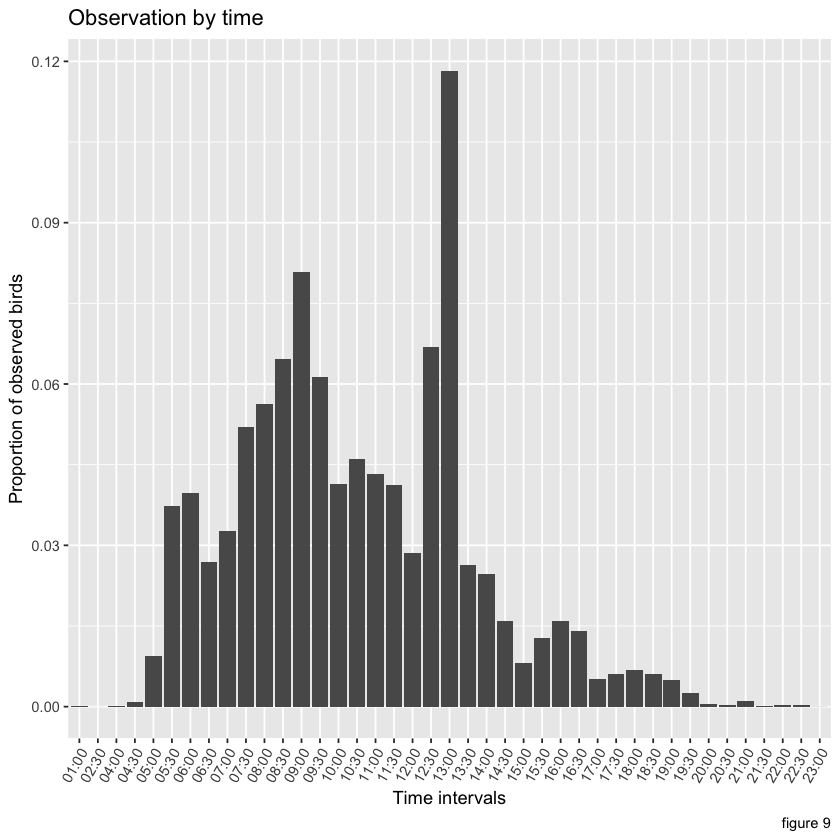

In [150]:
by_time_interval <- birds %>%
  select(Starttid, Antal) %>%
  filter(!is.na(Starttid) ) %>%
  mutate(Starttid = as.hms(paste0(Starttid, ":00")),Antal = as.numeric(Antal)) %>% #convert string to as.time
  filter(!is.na(Antal)  ) %>%
  mutate(Time_Interval = 
      cut(as.numeric(Starttid),   #divides the time into 30min intervals
      breaks = seq(0, 86400, by = 1800), 
      labels = format(seq(
      as.POSIXct("00:00", format = "%H:%M"), 
      as.POSIXct("23:30", format = "%H:%M"), 
      by = "30 mins"), "%H:%M"), 
      include.lowest = TRUE)) %>% 
  group_by(Time_Interval) %>% 
  summarize(count = sum(Antal)) %>% 
  ungroup() %>%
  mutate(norm_count = count/sum(count))

ggplot(by_time_interval, aes(x = Time_Interval, y = norm_count))+
    geom_bar(stat = 'identity')+
    labs(title = 'Observation by time',
         x='Time intervals',
         y="Proportion of observed birds",
         caption = 'figure 9')+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


## Location of Sothönor
In Table 4, we have counted the number of observations of the second most prevalent species, Sothöna, by location. It is notable that the locations where Sothöna has been observed most frequently often include names like "holmen" or "udden," suggesting that the bird is most likely to be seen near of waters.

In [72]:
sothöna <- birds %>% 
  filter(Artnamn =='Sothöna') %>% 
  select(Antal,Lokalnamn) %>% 
  mutate(Antal = ifelse( is.na(as.numeric(Antal)), NA, as.numeric(Antal))) %>% 
  group_by(Lokalnamn) %>% 
  summarize(count=sum(Antal,na.rm=FALSE)) %>% 
  arrange(desc(count))

kable(head(sothöna,10),caption = "4. Sothöna by location")



Table: 4. Sothöna by location

|Lokalnamn                      | count|
|:------------------------------|-----:|
|Blockhusudden                  |   390|
|Skeppsholmen och Kastellholmen |   301|
|Fjäderholmarna                 |   250|
|Biskopsudden                   |   206|
|Täcka udden                    |   160|
|Waldemarsudde                  |   158|
|Bockholmen                     |   153|
|Blockhusudden, Djurgården      |   150|
|Bergshamra                     |   126|
|Manilla                        |    60|

# Predicting Strokes 
The file stroke-data.csv contains information on stroke cases and related individual details. I'll explore the dataset to uncover patterns and relationships between variables. You can see the format of the data in table 5. 

In [76]:
stroke <- read.csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv')
kable(head(stroke,5),caption = '5')



Table: 5

|    id|gender | age| hypertension| heart_disease|ever_married |work_type     |Residence_type | avg_glucose_level|bmi  |smoking_status  | stroke|
|-----:|:------|---:|------------:|-------------:|:------------|:-------------|:--------------|-----------------:|:----|:---------------|------:|
|  9046|Male   |  67|            0|             1|Yes          |Private       |Urban          |            228.69|36.6 |formerly smoked |      1|
| 51676|Female |  61|            0|             0|Yes          |Self-employed |Rural          |            202.21|N/A  |never smoked    |      1|
| 31112|Male   |  80|            0|             1|Yes          |Private       |Rural          |            105.92|32.5 |never smoked    |      1|
| 60182|Female |  49|            0|             0|Yes          |Private       |Urban          |            171.23|34.4 |smokes          |      1|
|  1665|Female |  79|            1|             0|Yes          |Self-employed |Rural          |            174.1

## Distribution of age groups 
Figure 10 illustrates that the age distribution is not significantly skewed, with at least 60 observations in each group. This balanced distribution enhances the reliability of the ongoing analysis.

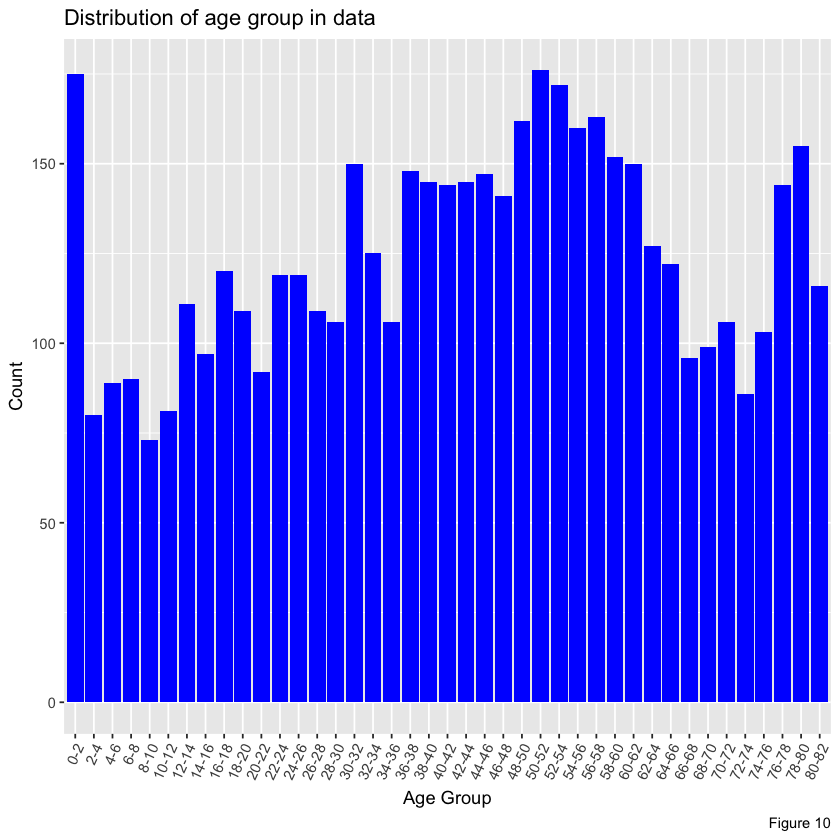

In [158]:
by_age <- stroke %>% 
  mutate(age.group = cut(age,breaks = seq(0, 100, by = 2),right = TRUE,  
      labels = paste(seq(0, 98, by = 2), seq(2, 100, by = 2), sep = "-"))) %>% 
  select(age.group)

ggplot(by_age, aes(x=age.group))+
  geom_bar(fill= 'blue')+
  theme(axis.text.x = element_text(angle = 65, hjust = 1))+
labs(title = 'Distribution of age group in data',
    y = 'Count',
    x = 'Age Group',
    caption = 'Figure 10')


## Age and Stroke-risk
Age appears to have a clear correlation with stroke risk, as shown in Figure 11. To enhance the ongoing analysis, data for individuals below the age of 36 will be excluded, as this group contains only three cases, making these points non-representative for that age group.

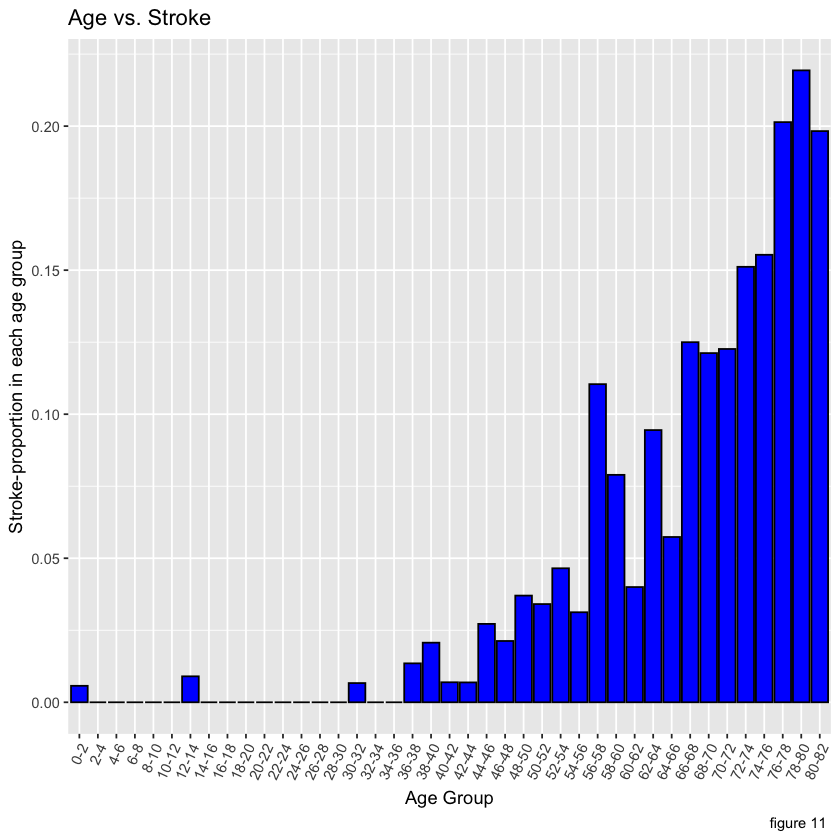

In [159]:
stroke_vs_age <- stroke %>% 
  select(age,stroke) %>% 
  mutate(age.group = cut(age,breaks = seq(0, 100, by = 2),right = TRUE,  
      labels = paste(seq(0, 98, by = 2), seq(2, 100, by = 2), sep = "-"))) %>% 
  group_by(age.group) %>% 
  summarize(proportion.of.stroke = mean(stroke),count=(n())) %>% 
  mutate(strokes_in_group = round(proportion.of.stroke*count))


ggplot(stroke_vs_age, aes(x=age.group,y=proportion.of.stroke))+
  geom_bar(stat='identity',color = 'black',fill ='blue')+
  theme(axis.text.x = element_text(angle = 65, hjust = 1))+
  labs(title = 'Age vs. Stroke ',
       x= 'Age Group',
       y = "Stroke-proportion in each age group",
      caption = 'figure 11 ')

## Gender Distribution
As shown in Figure 12, there appears to be a reasonable balance between the two genders. Neither gender is completely dominant in the data, indicating a fairly even representation.

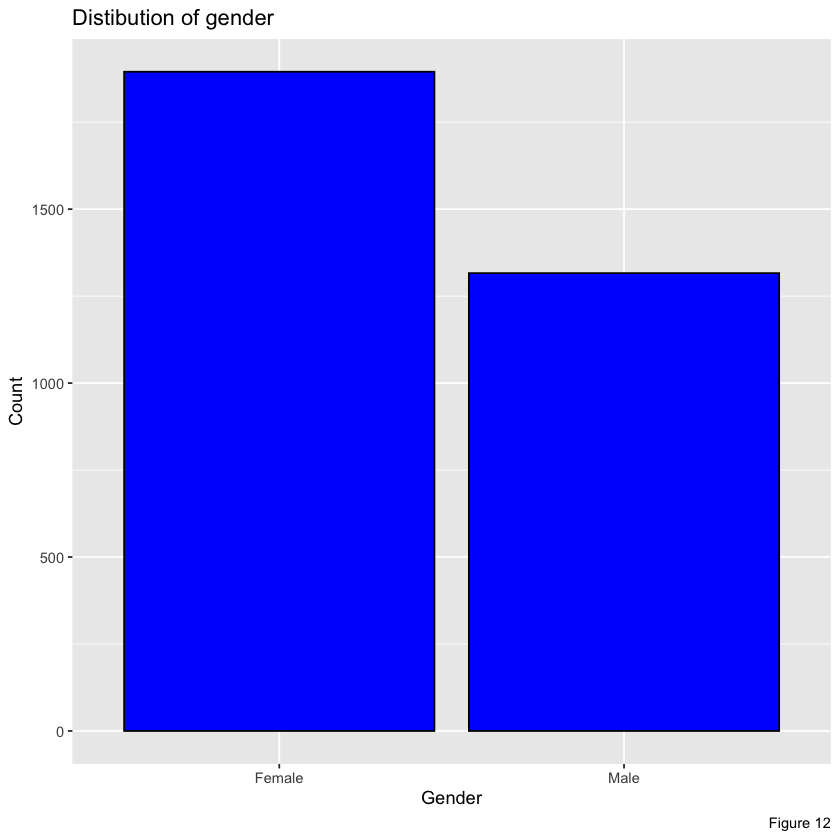

In [162]:
by_gender <- stroke %>%
  filter(gender != 'Other' & age >=36) %>% 
  select(gender)

ggplot(by_gender, aes(x=gender))+
  geom_bar(fill = "blue", color = "black")+
  labs(title = 'Distibution of gender',
      x= 'Gender',
      y = 'Count',
      caption = 'Figure 12')
  

## Proporition of stroke by gender & age
We can see something interesting in Figure 13 below. The proportion of strokes in each age group, divided by gender, seems to be quite similar overall, with little difference between men and women. However, there is a noticeable gap in the 56–64 age group, where the proportion of strokes differs more between genders. This raises the question: why is this gap so large in this specific age group? It could be worth exploring further in additional analysis.

In Figure 14, we can see that this difference is not due to a lack of data in the 56–64 age group, as there is a decent amount of data available for that group. 


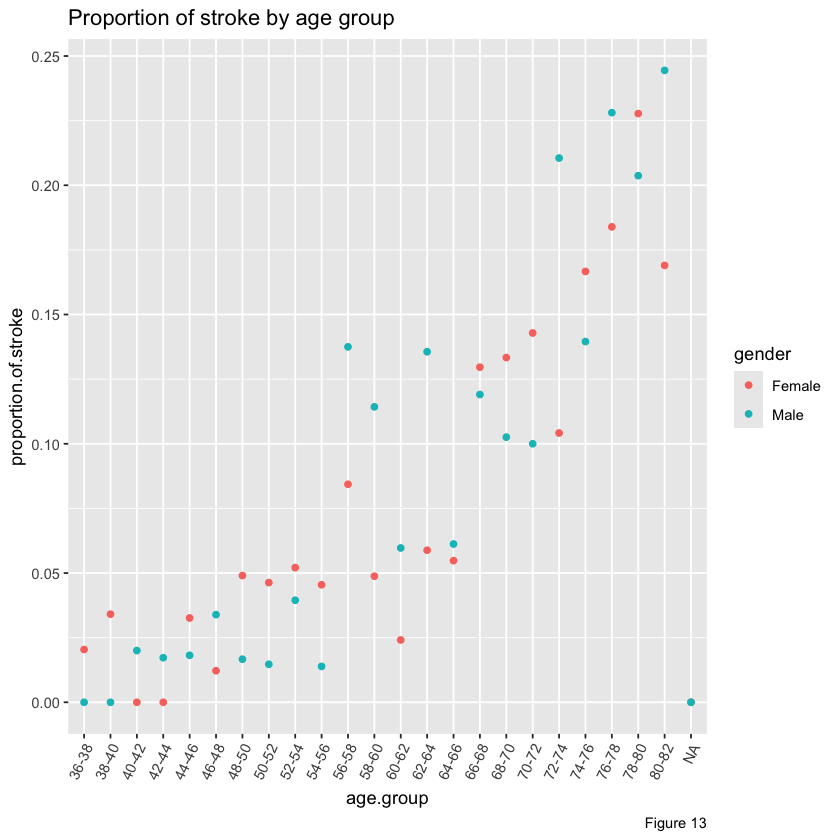

In [103]:
by_gender_and_age <- stroke %>% 
  select(gender, age, stroke) %>%
  filter(age >= 36) %>% 
  filter(gender != 'Other') %>% 
  mutate(age.group = cut(age,breaks = seq(36, 82, by = 2),right = TRUE,  
      labels = paste(seq(36, 80, by = 2), seq(38, 82, by = 2), sep = "-"))) %>% 
  group_by(age.group, gender) %>% 
  summarize(proportion.of.stroke = mean(stroke),count = n(),.groups = "drop")


ggplot(by_gender_and_age,aes(x=age.group,y=proportion.of.stroke,color=gender))+
  geom_point()+
  labs(title = 'Proportion of stroke by age group ',
      caption = 'Figure 13')+
  theme(axis.text.x = element_text(angle = 65, hjust = 1))



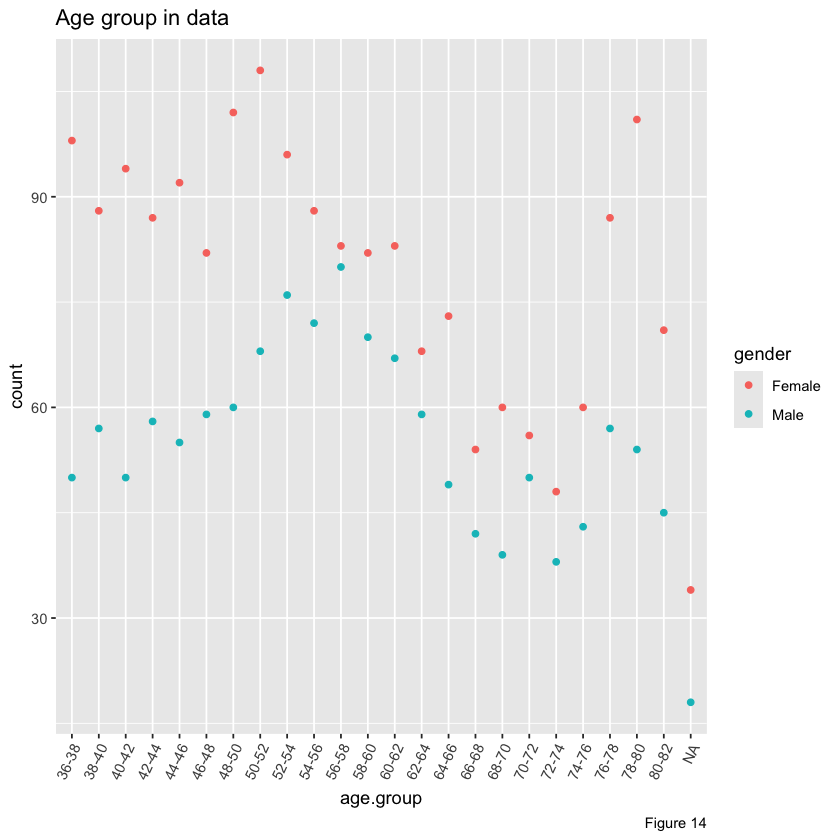

In [104]:
ggplot(by_gender_and_age,aes(x=age.group,y=count,color = gender))+
  geom_point()+
  labs(title = 'Age group in data',
      caption = 'Figure 14')+
  theme(axis.text.x = element_text(angle = 65, hjust = 1))

## Distribution of BMI by age groups in data
Below, we can see the distribution of BMI by age groups in the dataset. The blue line represents the threshold for being classified as 'overweight.' This plot indicates that the dataset is balanced in terms of BMI across age groups but also reveals that the majority of observations fall into the 'overweight' category. It is important to keep this in mind when drawing any conclusions based on this dataset. Does this represent an accurate depiction of BMI distribution in the general population?

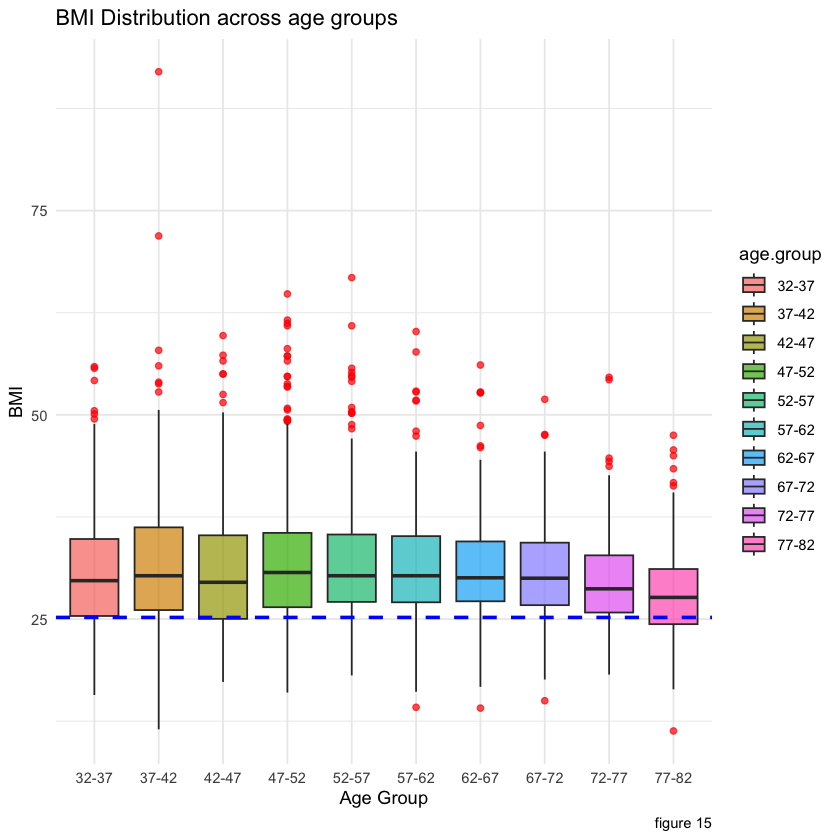

In [165]:
bmi_over_all <- stroke %>% 
  select(bmi,age) %>%   
  mutate(bmi = ifelse(is.na(as.numeric(bmi)),NA,as.numeric(bmi))) %>% 
  filter(age > 32 & !is.na(bmi)) %>% 
  mutate(age.group = cut(age,breaks = seq(32, 82, by = 5),right = TRUE,  
      labels = paste(seq(32, 77, by = 5), seq(37, 83, by = 5), sep = "-"))) 

ggplot(bmi_over_all, aes(x = age.group, y = bmi, fill = age.group)) +
  geom_boxplot(alpha = 0.7, outlier.color = "red") + 
  geom_hline(yintercept = 25.2, linetype = "dashed", color = "blue", size = 1)+
  labs(
    title = "BMI Distribution across age groups",
    x = "Age Group",
    y = "BMI",
    caption = 'figure 15'
  ) +
  theme_minimal() 

# Data Cleaning
Now we are going to clean cell_phones_total.csv by handling missing values and converting strings like "k/M/B" to numbers.

## Load data 
Here is a first glimpse of the data:

In [128]:
cellphone <- read.csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv')
library(zoo)

head(cellphone)

,iso.3,X1960,X1965,X1966,X1967,X1968,X1969,X1970,X1971,X1972,⋯,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019
,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ABW,0,0,NA,NA,NA,NA,0,NA,NA,⋯,132k,,135k,139k,140k,141k,,,,
2,AFG,0,0,NA,NA,NA,NA,0,NA,NA,⋯,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
3,AGO,0,0,NA,NA,NA,NA,0,NA,NA,⋯,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
4,ALB,0,0,NA,NA,NA,NA,0,NA,NA,⋯,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
5,AND,0,0,NA,NA,NA,NA,0,NA,NA,⋯,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
6,ARE,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,10.9M,11.7M,13.8M,16.1M,16.8M,17.9M,19.9M,19.8M,20.1M,19.6M


We begin by converting the values to  type 'dbl' and replaing "k", "M"  & "B" with it's corresponsing values:

In [166]:
# Converts 'k','M' &'B' to dbl
for (i in 2:length(cellphone[1,])) {
  for (j in seq_len(nrow(cellphone))){

    if(grepl('k',cellphone[j, i])){
      cellphone[j, i] <- gsub('k','e3',cellphone[j, i])}

    if(grepl('M',cellphone[j, i])){
      cellphone[j, i] <- gsub('M','e6',cellphone[j, i])}

    if(grepl('B',cellphone[j, i])){
      cellphone[j, i] <- gsub('B','e9',cellphone[j, i])}
  }
}


We set all NAs before the first non-zero value in each row to 0. While some of these NAs might represent actual integers, this approach is the best we can implement. Additionally, we will exclude all data prior to 1980, as no phones were registered before that year (Accually, we will include 1979 for now to make the "first_zeros"-implentation later on easier, this colon will be removed later.):

In [130]:
# make string as numeric(not the name)
cellphone_numeric <- cellphone %>%
  mutate(across(-iso.3, as.numeric))

# All NA before first non-zero element per row set to 0
for(j in seq(nrow(cellphone_numeric))){
  row <- cellphone_numeric[j,][-1]
  if(all(is.na(row))){
    cellphone_numeric[j,][-1] <- numeric(length(cellphone_numeric[j,][-1]))}
  else{
    first_nonzero <- which(!is.na(row) & row>0)[1]
    cellphone_numeric[j,][-1][1:(first_nonzero-1)] <- numeric((first_nonzero-1))}
}
# filtering away prehistorical data
cellphone_numeric <- cellphone_numeric %>% 
  select(iso.3,X1979:X2019)


We filter out rows with "too many" NAs, setting the threshold at 50%. This proportion is calculated for each row, excluding the initial zeros. For the remaining NAs, we replace them using linear interpolation, although more complex interpolation methods could also be considered:

In [170]:
poor_data <- c()
for (i in seq(nrow(cellphone_numeric))) {
    
  #strip away all zeros in the beginin of a row
  first_zeros <- which(cellphone_numeric[i, -1] != 0)[1] - 1
  vec <- cellphone_numeric[i, -(1:(first_zeros + 1))]
  proportion_of_NA <- mean(is.na(vec))
  # filter away those row with +50% NA's 
  if (proportion_of_NA > 0.4) {
    poor_data <- c(poor_data, cellphone_numeric[i, 1])
      
  #linear interpolation for the missing values 
  } else {
  interpolerad <- na.approx(vec, na.rm = FALSE)
  fylld <- na.locf(interpolerad, na.rm = FALSE)
  fylld <- na.locf(fylld, fromLast = TRUE)
  cellphone_numeric[i, -(1:(first_zeros + 1))] <- fylld
  }
}
#filter away those rows with "too much" NA's
filtered_data <- cellphone_numeric %>%
  filter(!(iso.3 %in% poor_data)) %>%
  select(-X1979)  #e


Here is a glimpse of the final result:

In [169]:
head(filtered_data,10)

,iso.3,X1980,X1981,X1982,X1983,X1984,X1985,X1986,X1987,X1988,⋯,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ABW,0,0,0,0,0,0,0,0,0,⋯,132000,132000,135000,139000,140000,141000,141000,141000,141000,141000
2,AFG,0,0,0,0,0,0,0,0,0,⋯,10200000,13800000,15300000,16800000,18400000,19700000,21600000,23900000,22000000,22600000
3,AGO,0,0,0,0,0,0,0,0,0,⋯,9400000,12100000,12800000,13300000,14100000,13900000,13000000,13300000,13300000,14800000
4,ALB,0,0,0,0,0,0,0,0,0,⋯,2690000,3100000,3500000,3690000,3360000,3400000,3370000,3630000,2710000,2630000
5,AND,0,0,0,0,0,0,0,0,0,⋯,65500,65000,63900,63900,66200,71300,76100,80300,82600,87900
6,ARE,0,0,2330,3560,4940,7920,11200,13700,13800,⋯,10900000,11700000,13800000,16100000,16800000,17900000,19900000,19800000,20100000,19600000
7,ARG,0,0,0,0,0,0,0,0,0,⋯,57100000,60700000,64300000,67400000,61200000,61800000,63700000,61900000,58600000,58600000
8,ARM,0,0,0,0,0,0,0,0,0,⋯,3870000,3210000,3320000,3350000,3460000,3460000,3430000,3490000,3580000,3620000
9,ATG,0,0,0,0,0,0,0,0,0,⋯,168000,176000,127000,114000,120000,176000,180000,184000,184000,184000
